In [7]:
from langgraph.graph import StateGraph , START, END
from typing  import TypedDict

In [39]:
class Batsmanstate(TypedDict):
    
    runs: int
    balls: int
    fours :int
    sixes : int

    sr : float
    bpb : float
    boundarypercent :float
    summary : str

In [40]:
def calculate_sr(state: Batsmanstate)-> Batsmanstate:
    sr = (state['runs']/state['balls'])/100
    return {'sr':sr}
def calculate_bpb(state: Batsmanstate)-> Batsmanstate:
    bpb =  state['balls']/(state['fours']+state['sixes'])
    return {'bpb':bpb}

def calculate_boundary_percent(state: Batsmanstate)-> Batsmanstate:
    boundarypercent = (((state['fours']*4) + (state['sixes']*6))/state['runs'])*100
    return {'boundarypercent':boundarypercent}

def calculate_summaray(state: Batsmanstate)-> Batsmanstate:
    summary = f"""
    Strike Rate - {state['sr']} \n
    balls per boundary - {state['bpb']} \n
    boundary percent - {state['boundarypercent']}
    """
    return {"summary": summary}

In [41]:
graph = StateGraph(Batsmanstate)

graph.add_node("calculate_sr",calculate_sr)
graph.add_node("calculate_bpb",calculate_bpb)
graph.add_node("calculate_boundary_percent",calculate_boundary_percent)
graph.add_node("calculate_summaray",calculate_summaray)

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_sr', 'calculate_summaray')
graph.add_edge('calculate_bpb','calculate_summaray')
graph.add_edge('calculate_boundary_percent','calculate_summaray')

graph.add_edge('calculate_summaray', END)

workflow = graph.compile()

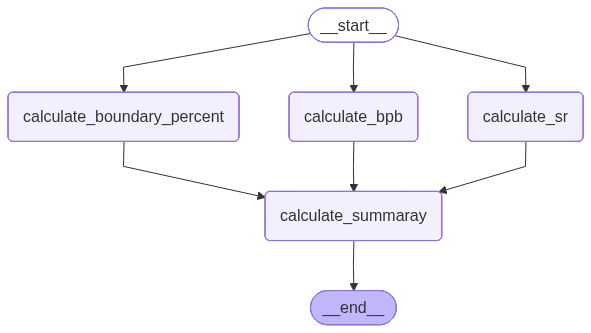

In [42]:
workflow

In [43]:
initial_state = {
    "runs" : 100 ,
    "balls" : 50 ,
    "fours" :  6 ,
    "sixes" : 4  
}

In [44]:
final_state = workflow.invoke(initial_state)

In [45]:
print(final_state['summary'])


    Strike Rate - 0.02 

    balls per boundary - 5.0 

    boundary percent - 48.0
    


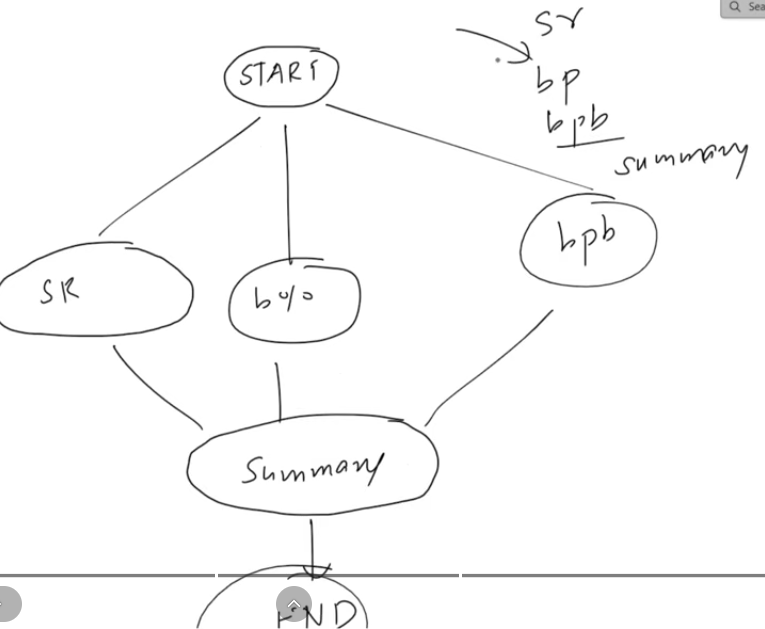